In [1]:
import tensorflow as tf
from tensorflow import keras as keras
print(tf.__version__)

print(keras.__version__)

2.8.2
2.8.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
max_features = 5000
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print(x_train[:3])

17473536/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472,

In [4]:
x_train[1]
y_train[1]

0

In [10]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, SimpleRNN, LSTM, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import History

from tensorflow.keras.datasets import imdb

# Zad
Pobierz zbiór danych

IMDB Movie reviews sentiment classification
Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

https://keras.io/datasets/

# Zad
Ujednolicenie długości ciągów - padding

In [11]:
# Ujednolicenie długości ciągów - padding:
maxlen = 400
X_train = sequence.pad_sequences(x_train,maxlen=maxlen)
X_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print(X_train.shape)
print(X_test.shape)

(25000, 400)
(25000, 400)


In [12]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

# Zad
Zmniejszmy zbiór danych

In [13]:
n_train = 5000
n_test = 2000
X_train = X_train[:n_train]
y_train = y_train[:n_train]
X_test = X_test[:n_test]
y_test = y_test[:n_test]
print(X_train.shape)
print(X_test.shape)

(5000, 400)
(2000, 400)


The Embedding layer is initialized with random weights and will learn an embedding for all of the words in the training dataset.

It is a flexible layer that can be used in a variety of ways, such as:

* It can be used alone to learn a word embedding that can be saved and used in another model later.
* It can be used as part of a deep learning model where the embedding is learned along with the model itself.
* It can be used to load a pre-trained word embedding model, a type of transfer learning.

The Embedding layer is defined as the first hidden layer of a network. It must specify 3 arguments:

It must specify 3 arguments:

* **input_dim**: This is the size of the vocabulary in the text data. For example, if your data is integer encoded to values between 0-10, then the size of the vocabulary would be 11 words.
* **output_dim**: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word. For example, it could be 32 or 100 or even larger. Test different values for your problem.
* **input_length**: This is the length of input sequences, as you would define for any input layer of a Keras model. For example, if all of your input documents are comprised of 1000 words, this would be 1000.

# Zad
Zwykła sieć rekurencyjna ( z embeddingami)

In [14]:
history = History()
model = Sequential()
model.add(Embedding(max_features, 50, input_length=maxlen)) # wyjscie z warstwy ma wymiar 50
model.add(SimpleRNN(100))
model.add(Dense(1,activation="sigmoid"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 400, 50)           250000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 100)               15100     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 265,201
Trainable params: 265,201
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(loss="binary_crossentropy",optimizer="adam", metrics=["accuracy"])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)
model.fit(X_train,y_train, epochs=100, validation_split=0.2, callbacks=[history, early_stopping])

Epoch 1/100
125/125 [==============================] - 18s 127ms/step - loss: 0.6919 - accuracy: 0.5135 - val_loss: 0.6892 - val_accuracy: 0.5150
Epoch 2/100
125/125 [==============================] - 17s 132ms/step - loss: 0.6413 - accuracy: 0.6522 - val_loss: 0.6792 - val_accuracy: 0.5670
Epoch 3/100
125/125 [==============================] - 16s 130ms/step - loss: 0.6421 - accuracy: 0.6345 - val_loss: 0.6606 - val_accuracy: 0.6180
Epoch 4/100
125/125 [==============================] - 16s 125ms/step - loss: 0.6396 - accuracy: 0.6647 - val_loss: 0.6682 - val_accuracy: 0.5620
Epoch 5/100
125/125 [==============================] - 16s 124ms/step - loss: 0.5979 - accuracy: 0.7003 - val_loss: 0.6373 - val_accuracy: 0.6290
Epoch 6/100
125/125 [==============================] - 15s 124ms/step - loss: 0.5238 - accuracy: 0.7515 - val_loss: 0.6488 - val_accuracy: 0.6260
Epoch 7/100
125/125 [==============================] - 17s 136ms/step - loss: 0.4366 - accuracy: 0.8005 - val_loss: 0.6260 -

In [16]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 2s 34ms/step - loss: 1.0694 - accuracy: 0.6955


[1.0693868398666382, 0.6955000162124634]

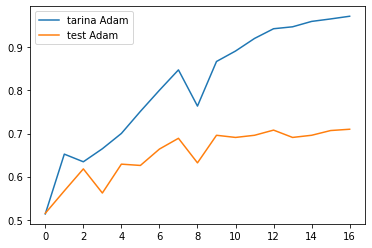

In [17]:

plt.plot(history.history['accuracy'], label = "tarina Adam")
plt.plot(history.history['val_accuracy'], label = "test Adam")


plt.legend()
plt.show()

# Zad
Proszę dodać
```python
SimpleRNN(100,dropout=0.5)
```

In [18]:
history_d = History()

model = Sequential()
model.add(Embedding(max_features, 
                    50))
model.add(SimpleRNN(100,dropout=0.5))
model.add(Dense(1,activation="sigmoid"))
model.summary()

model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)
model.fit(X_train,y_train, epochs=100, validation_split=0.2, callbacks=[history_d, early_stopping])


model.evaluate(X_test,y_test)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 50)          250000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 100)               15100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 265,201
Trainable params: 265,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
125/125 [==============================] - 20s 149ms/step - loss: 0.6990 - accuracy: 0.5008 - val_loss: 0.6870 - val_accuracy: 0.5500
Epoch 2/100
125/125 [==============================] - 17s 136ms/step - loss: 0.6829 - accuracy: 0.5548 - val_loss: 0.6869 - val_accuracy: 0.5190
Epoch 3/100
125/125 

[0.8273624181747437, 0.7634999752044678]

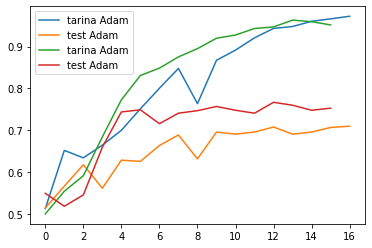

In [19]:
plt.plot(history.history['accuracy'], label = "tarina Adam")
plt.plot(history.history['val_accuracy'], label = "test Adam")

plt.plot(history_d.history['accuracy'], label = "tarina Adam")
plt.plot(history_d.history['val_accuracy'], label = "test Adam")

plt.legend()
plt.show()

# Zad
Sprawdź architekturę dwustronną
```python
Bidirectional(SimpleRNN(10,dropout=0.5))
```

In [20]:
history_d_10 = History()
model = Sequential()
model.add(Embedding(max_features, 
                    50,
                   input_length=maxlen))
model.add(Bidirectional(SimpleRNN(10,dropout=0.5)))
model.add(Dense(1,activation="sigmoid"))
model.summary()

model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)
model.fit(X_train,y_train, epochs=100, validation_split=0.2, callbacks=[history_d_10, early_stopping])

model.evaluate(X_test,y_test)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 400, 50)           250000    
                                                                 
 bidirectional (Bidirectiona  (None, 20)               1220      
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 251,241
Trainable params: 251,241
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
125/125 [==============================] - 21s 158ms/step - loss: 0.6969 - accuracy: 0.5070 - val_loss: 0.6888 - val_accuracy: 0.5260
Epoch 2/100
125/125 [==============================] - 20s 156ms/step - loss: 0.6316 - accuracy: 0.6

[1.1303547620773315, 0.5400000214576721]

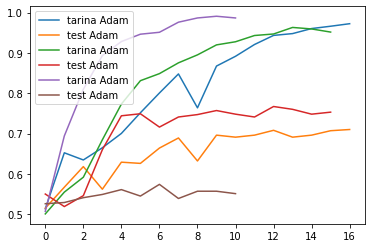

In [21]:
plt.plot(history.history['accuracy'], label = "tarina Adam")
plt.plot(history.history['val_accuracy'], label = "test Adam")

plt.plot(history_d.history['accuracy'], label = "tarina Adam")
plt.plot(history_d.history['val_accuracy'], label = "test Adam")

plt.plot(history_d_10.history['accuracy'], label = "tarina Adam")
plt.plot(history_d_10.history['val_accuracy'], label = "test Adam")

plt.legend()
plt.show()

# Zad
Proszę sprawdzić dwie warstwy:
```python
model.add(SimpleRNN(10,return_sequences=True))
model.add(SimpleRNN(20))
```

In [22]:
history_2 = History()

model = Sequential()
model.add(Embedding(max_features, 
                    50,
                   input_length=maxlen))
model.add(SimpleRNN(10,return_sequences=True))
model.add(SimpleRNN(20))
model.add(Dense(1,activation="sigmoid"))
model.summary()

model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)
model.fit(X_train,y_train, epochs=100, validation_split=0.2, callbacks=[history_2, early_stopping])

model.evaluate(X_test,y_test)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 400, 50)           250000    
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 400, 10)           610       
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 20)                620       
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 251,251
Trainable params: 251,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
125/125 [==============================] - 20s 149ms/step - loss: 0.6941 - accuracy: 0.5228 - val_loss: 0.6858 - val_accuracy: 0.5480
Epoch 2/100
125/125 [=============

[1.1151987314224243, 0.6859999895095825]

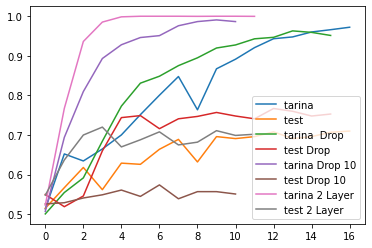

In [23]:
plt.plot(history.history['accuracy'], label = "tarina ")
plt.plot(history.history['val_accuracy'], label = "test ")

plt.plot(history_d.history['accuracy'], label = "tarina  Drop")
plt.plot(history_d.history['val_accuracy'], label = "test Drop")

plt.plot(history_d_10.history['accuracy'], label = "tarina Drop 10")
plt.plot(history_d_10.history['val_accuracy'], label = "test Drop 10")

plt.plot(history_2.history['accuracy'], label = "tarina 2 Layer")
plt.plot(history_2.history['val_accuracy'], label = "test 2 Layer")

plt.legend()
plt.show()

# LSTM

In [24]:
from tensorflow.keras.layers import LSTM

history_LSTM = History()
model = Sequential()
model.add(Embedding(max_features, 50,input_length=maxlen,mask_zero=True)) 
# mask_zero sprawia ze siec pomija zera na poczatku
model.add(LSTM(20))
model.add(Dense(1,activation="sigmoid"))
model.summary()

model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)
model.fit(X_train,y_train, epochs=100, validation_split=0.2, callbacks=[history_LSTM, early_stopping])

model.evaluate(X_test,y_test)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 400, 50)           250000    
                                                                 
 lstm (LSTM)                 (None, 20)                5680      
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 255,701
Trainable params: 255,701
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
125/125 [==============================] - 26s 185ms/step - loss: 0.6020 - accuracy: 0.6787 - val_loss: 0.4569 - val_accuracy: 0.8070
Epoch 2/100
125/125 [==============================] - 27s 218ms/step - loss: 0.3478 - accuracy: 0.8605 - val_loss: 0.3944 - val_accuracy: 0.8300
Epoch 3/100
125/125 

[0.7643741369247437, 0.8180000185966492]

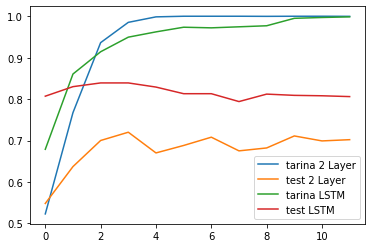

In [25]:
plt.plot(history_2.history['accuracy'], label = "tarina 2 Layer")
plt.plot(history_2.history['val_accuracy'], label = "test 2 Layer")

plt.plot(history_LSTM.history['accuracy'], label = "tarina LSTM")
plt.plot(history_LSTM.history['val_accuracy'], label = "test LSTM")

plt.legend()
plt.show()

# GRU

In [26]:
from tensorflow.keras.layers import GRU

history_GRU = History()
model = Sequential()
model.add(Embedding(max_features, 
                    50,
                   input_length=maxlen,
                   mask_zero=True)) 
# mask_zero sprawia ze siec pomija zera na poczatku
model.add(GRU(20))
model.add(Dense(1,activation="sigmoid"))
model.summary()

model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)
model.fit(X_train,y_train, epochs=100, validation_split=0.2, callbacks=[history_GRU, early_stopping])

model.evaluate(X_test,y_test)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 400, 50)           250000    
                                                                 
 gru (GRU)                   (None, 20)                4320      
                                                                 
 dense_6 (Dense)             (None, 1)                 21        
                                                                 
Total params: 254,341
Trainable params: 254,341
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
125/125 [==============================] - 24s 171ms/step - loss: 0.6634 - accuracy: 0.5965 - val_loss: 0.5724 - val_accuracy: 0.6920
Epoch 2/100
125/125 [==============================] - 20s 159ms/step - loss: 0.4058 - accuracy: 0.8188 - val_loss: 0.4717 - val_accuracy: 0.7840
Epoch 3/100
125/125 

[0.9404917359352112, 0.7894999980926514]

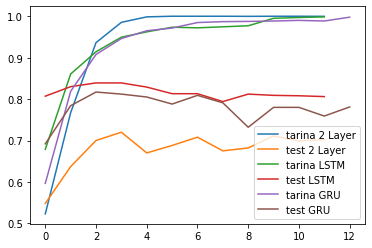

In [27]:
plt.plot(history_2.history['accuracy'], label = "tarina 2 Layer")
plt.plot(history_2.history['val_accuracy'], label = "test 2 Layer")

plt.plot(history_LSTM.history['accuracy'], label = "tarina LSTM")
plt.plot(history_LSTM.history['val_accuracy'], label = "test LSTM")

plt.plot(history_GRU.history['accuracy'], label = "tarina GRU")
plt.plot(history_GRU.history['val_accuracy'], label = "test GRU")

plt.legend()
plt.show()

# Zad

Zbóduj model używający 
```python
Bidirectional LSTM
```

https://machinelearningmastery.com/develop-bidirectional-lstm-sequence-classification-python-keras/

https://keras.io/examples/imdb_bidirectional_lstm/

# Zad. 
Zbuduj model używający 
```python
model.add(TimeDistributed(Dense(1, activation='sigmoid')))
```

https://stackoverflow.com/questions/53670332/why-not-use-flatten-followed-by-a-dense-layer-instead-of-timedistributed